# Model Development
##### We will develop several models that will predict the price of the Car (Automobile) using the variables or features. This is just an estimate but should give us an objective idea of how much the car should cost.

Some questions we want to ask :

<ul>
    <li>Do I know if the dealer is offering fair value for my trade-in?</li>
    <li>Do I know if I put a fair value on my car?</li>
</ul>

<h2>Table of Contents</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol>
    <li><a href="https://#import_data">Linear Regression and Multiple Linear Regression</a></li>
    <li><a href="https://#pattern_visualization">Model Evaluation Using Visualization</a></li>
    <li><a href="https://#discriptive_statistics">Polynomial Regression and Pipelines</a></li>
    <li><a href="https://#grouping">Measures for In-Sample Evaluation</a></li>
    <li><a href="https://#correlation_causation">Prediction and Decision Making</a></li>
</ol>

</div>

<hr>

<h4>Setup</h4>


Install the required libraries

In [ ]:
! pip install pandas
! pip install matplotlib
! pip install scipy
! pip install seaborn
! pip install scikit-learn

Import libraries:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Load the data and store it in dataframe `df`:


In [3]:
filename="clean_AutoMobile.csv"
df = pd.read_csv(filename, index_col=0)

<h2>1. Linear Regression and Multiple Linear Regression</h2>


<h4>Linear Regression</h4>


<p>The result of Linear Regression is a <b>linear function</b> that predicts the response (dependent) variable as a function of the predictor (independent) variable.</p>


$$
Y: Response \ Variable\\\\\\\\\\
X: Predictor \ Variables
$$


<b>Linear Function</b>
$$
Yhat = a + b  X
$$


<h4>Let's load the modules for linear regression:</h4>


In [4]:
from sklearn.linear_model import LinearRegression

<h4>Create the linear regression object:</h4>


In [5]:
lm = LinearRegression()
lm

LinearRegression()

<h4>How could "highway-mpg" help us predict car price?</h4>


For this example, we want to look at how highway-mpg can help us predict car price.
Using simple linear regression, we will create a linear function with "highway-mpg" as the predictor variable and the "price" as the response variable.


In [6]:
X = df[['highway-mpg']]
Y = df['price']

Fit the linear model using highway-mpg:


In [7]:
lm.fit(X,Y)

LinearRegression()

We can output a prediction:


In [8]:
Yhat=lm.predict(X)
Yhat[0:5]   

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

<h4>What is the value of the intercept (a)?</h4>


In [9]:
lm.intercept_

38423.305858157386

<h4>What is the value of the slope (b)?</h4>


In [10]:
lm.coef_

array([-821.73337832])

<h3>What is the final estimated linear model we get?</h3>


As we saw above, we should get a final linear model with the structure:


$$
Yhat = a + b  X
$$


Plugging in the actual values we get:


<b>Price</b> = 38423.31 - 821.73 x <b>highway-mpg</b>


##### How could "engine-size" help us predict car price?

In [11]:
# Train a model using "engine-size" as the independent variable and "price" as the dependent variable 
lm1 = LinearRegression()
lm1.fit(df[['engine-size']], df[['price']])
lm1

LinearRegression()

<h4>Slope</h4>


In [12]:
lm1.coef_

array([[166.86001569]])

<h4>Intercept</h4>


In [13]:
lm1.intercept_

array([-7963.33890628])

In [14]:
# What is the equation of the predicted line?

Yhat=-7963.34 + 166.86*X
Price=-7963.34 + 166.86*df['engine-size']

<h4>Multiple Linear Regression</h4>


<p>We want to predict car price using more than one variable</p>

The equation is given by:


$$
Yhat = a + b\_1 X\_1 + b\_2 X\_2 + b\_3 X\_3 + b\_4 X\_4
$$


<p>We know that other good predictors of price could be:</p>
<ul>
    <li>Horsepower</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Highway-mpg</li>
</ul>
Let's develop a model using these variables as the predictor variables.


In [15]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

Fit the linear model using the four above-mentioned variables.


In [16]:
lm.fit(Z, df['price'])

LinearRegression()

What is the value of the intercept(a)?


In [17]:
lm.intercept_

-15811.863767729243

What are the values of the coefficients (b1, b2, b3, b4)?


In [18]:
lm.coef_

array([53.53022809,  4.70805253, 81.51280006, 36.1593925 ])

What is the final estimated linear model that we get?


As we saw above, we should get a final linear function with the structure:

$$
Yhat = a + b\_1 X\_1 + b\_2 X\_2 + b\_3 X\_3 + b\_4 X\_4
$$

What is the linear function we get in this example?


<b>Price</b> = -15678.742628061467 + 53.53022809 x <b>horsepower</b> + 4.70805253 x <b>curb-weight</b> + 81.51280006 x <b>engine-size</b> + 36.1593925 x <b>highway-mpg</b>


When the predictor variables are "normalized-losses" and "highway-mpg"

In [19]:
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses' , 'highway-mpg']],df['price'])

LinearRegression()

In [20]:
# What are the values of the coefficients (b1, b2)? 
lm2.coef_

array([   1.49789586, -820.45434016])

What is the value of the intercept(a)?

In [21]:
lm2.intercept_

38201.31327245728

<h2>2. Model Evaluation Using Visualization</h2>


In [22]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline

<h3>Regression Plot</h3>


<p>When it comes to simple linear regression, an excellent way to visualize the fit of our model is by using <b>regression plots</b>.</p>

Let's visualize **highway-mpg** as potential predictor variable of price:


(0.0, 48164.86652546567)

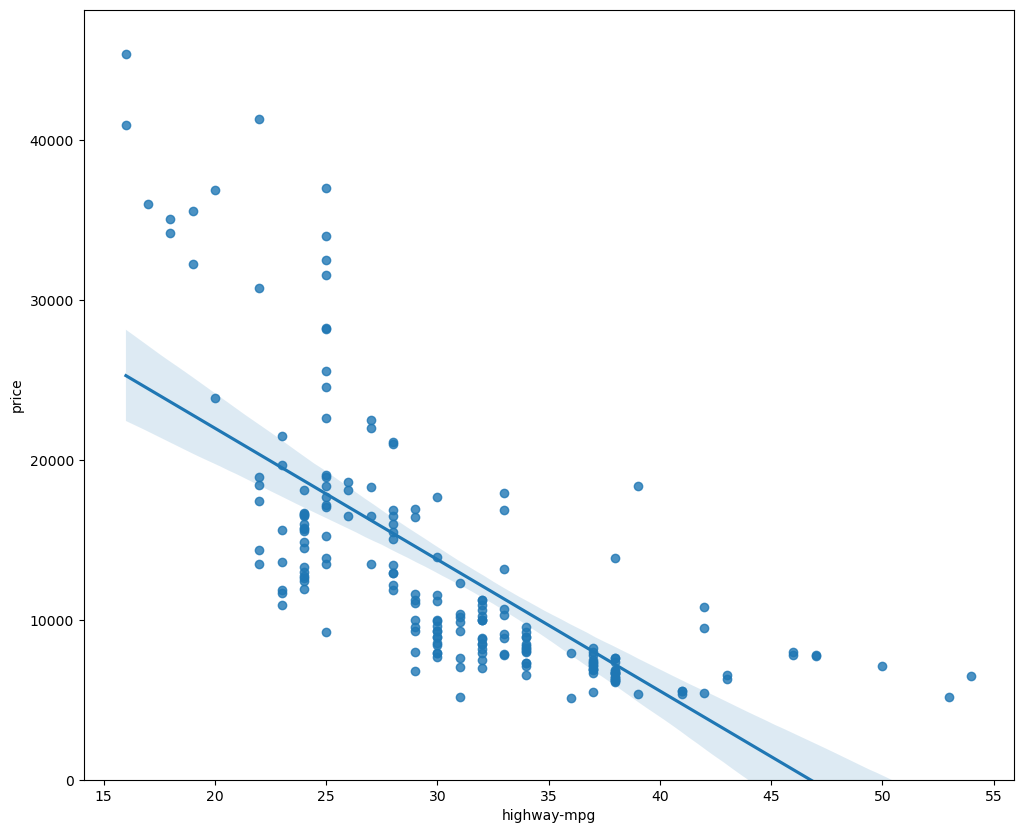

In [23]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

<p>We can see from this plot that price is negatively correlated to highway-mpg since the regression slope is negative.

Let's compare this plot to the regression plot of "peak-rpm".</p>

(0.0, 47414.1)

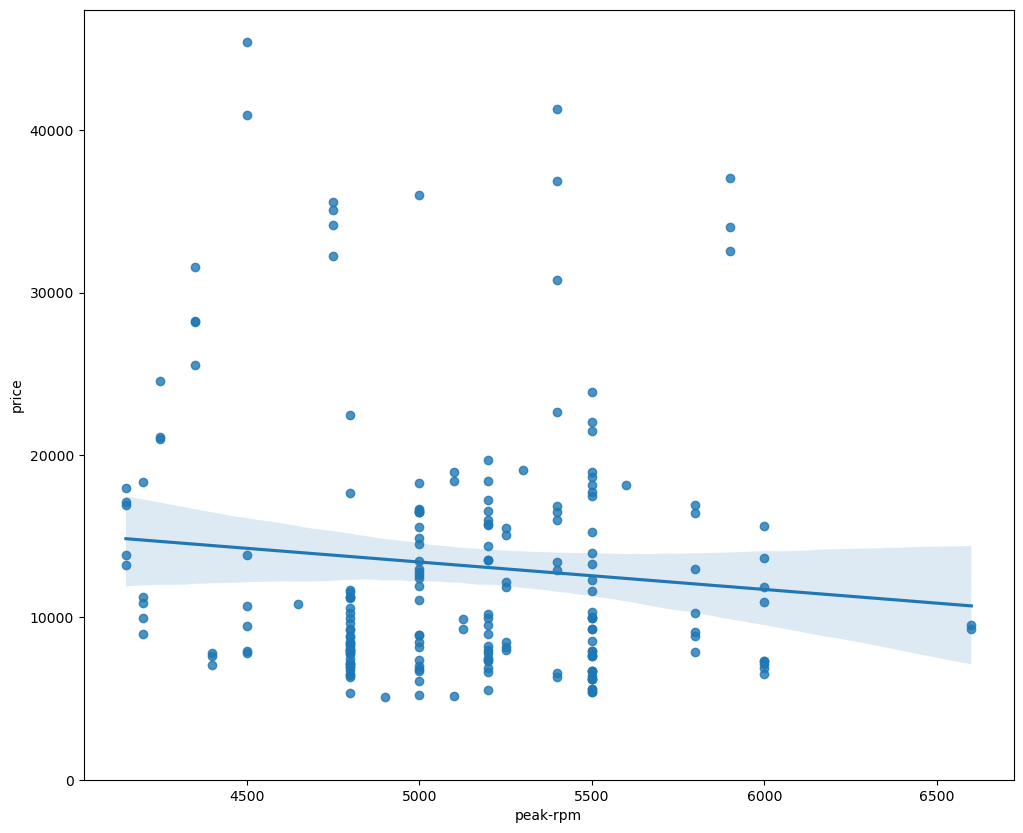

In [24]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

<p>Comparing the regression plot of "peak-rpm" and "highway-mpg", we see that the points for "highway-mpg" are much closer to the generated line and, on average, decrease. The points for "peak-rpm" have more spread around the predicted line and it is much harder to determine if the points are decreasing or increasing as the "peak-rpm" increases.</p>


The variable "highway-mpg" has a stronger correlation with "price", it is approximate -0.704692  compared to "peak-rpm" which is approximate -0.101616.<br />
You can verify it using the following command:

In [25]:
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


<h3>Residual Plot</h3>

<p>A good way to visualize the variance of the data.</p>

<p>We look at the spread of the residuals:</p>

<p>- If the points in a residual plot are <b>randomly spread out around the x-axis</b>, then a <b>linear model is appropriate</b> for the data.

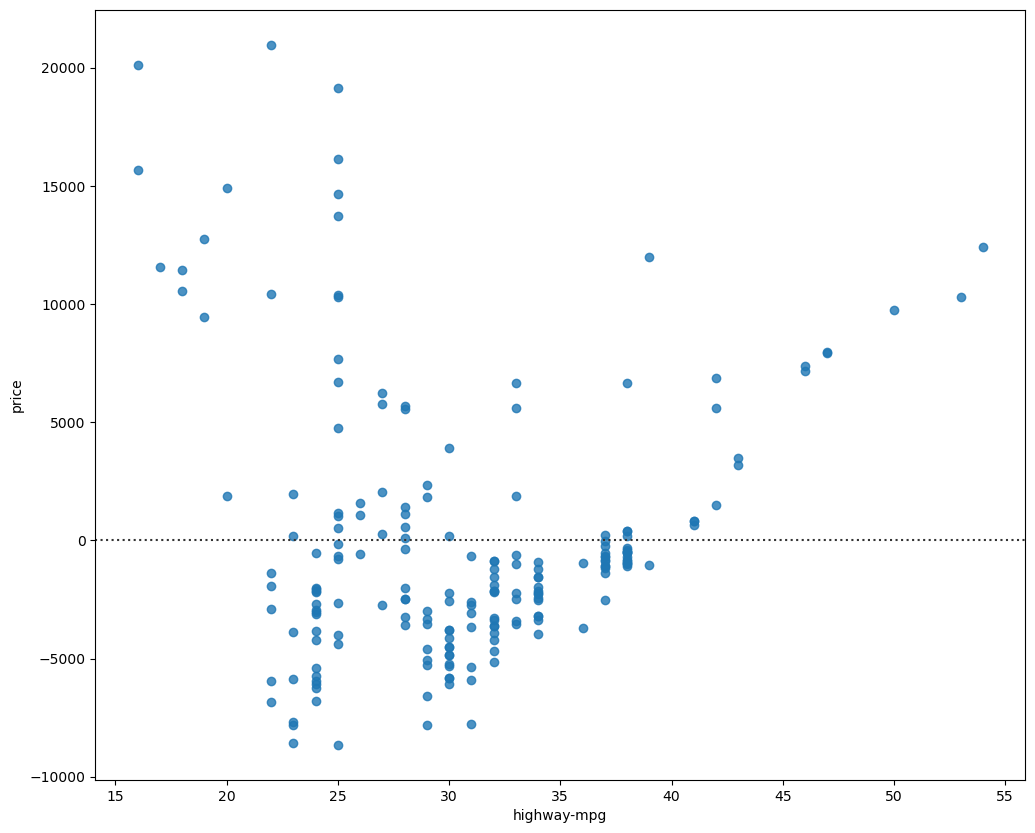

In [26]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'],y=df['price'])
plt.show()

<i>What is this plot telling us?</i>

<p>We can see from this residual plot that the residuals are not randomly spread around the x-axis, leading us to believe that maybe a non-linear model is more appropriate for this data.</p>


<h3>Multiple Linear Regression</h3>


<p>One way to look at the fit of the model is by looking at the <b>distribution plot</b>. We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.</p>


First, let's make a prediction:


In [27]:
Y_hat = lm.predict(Z)

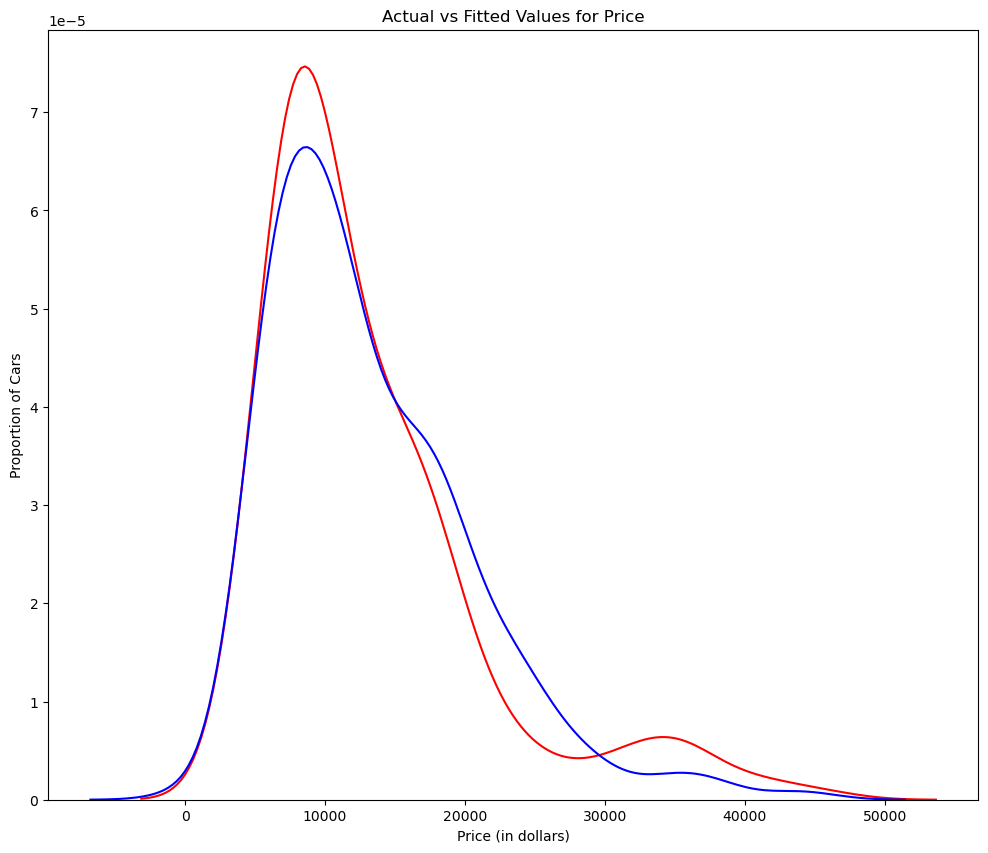

In [28]:
plt.figure(figsize=(width, height))

ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

<p>We can see that the fitted values are reasonably close to the actual values since the two distributions overlap a bit. However, there is definitely some room for improvement.</p>


<h2>3. Polynomial Regression and Pipelines</h2>


<p>There are different orders of polynomial regression:</p>

<center><b>Quadratic - 2nd Order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 
$$

<center><b>Cubic - 3rd Order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 +b_3 X^3\\\\\\\\\\
$$

<center><b>Higher-Order</b>:</center>
$$
Y = a + b_1 X +b_2 X^2 +b_3 X^3 ....\\\\
$$


<p>We saw earlier that a linear model did not provide the best fit while using "highway-mpg" as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.</p>


<p>We will use the following function to plot the data:</p>


In [29]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

Let's get the variables:


In [30]:
x = df['highway-mpg']
y = df['price']

Let's fit the polynomial using the function <b>polyfit</b>, then use the function <b>poly1d</b> to display the polynomial function.


In [31]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


Let's plot the function:


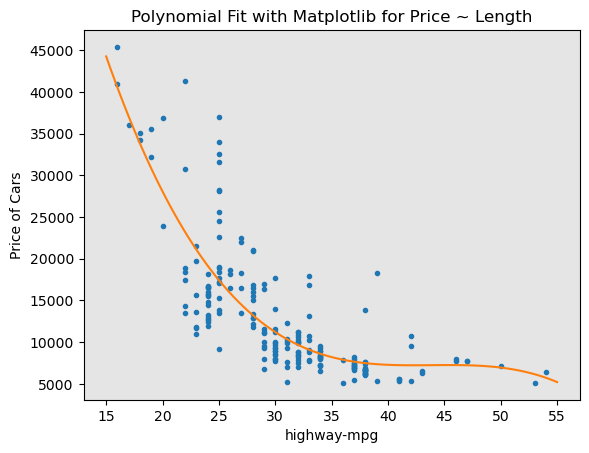

In [32]:
PlotPolly(p, x, y, 'highway-mpg')

In [33]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

<p>We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function  "hits" more of the data points.</p>


            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


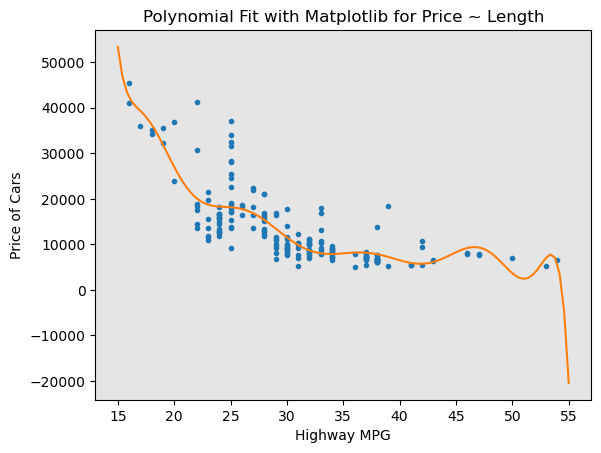

In [34]:
# Here we use a polynomial of the 11rd order
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

<h2>Pipeline</h2>


<p>Data Pipelines simplify the steps of processing the data. We use the module <b>Pipeline</b> to create a pipeline. We also use <b>StandardScaler</b> as a step in our pipeline.</p>


In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

We create the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor.


In [41]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

We input the list as an argument to the pipeline constructor:


In [42]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

First, we convert the data type Z to type float to avoid conversion warnings that may appear as a result of StandardScaler taking float inputs.

Then, we can normalize the data,  perform a transform and fit the model simultaneously.


In [43]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

Similarly,  we can normalize the data, perform a transform and produce a prediction  simultaneously.


In [44]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.93329646, 13102.93329646, 18226.43450275, 10391.09183955])

In [45]:
# produce a prediction using a linear regression model using the features Z and target y
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.07700462, 13699.07700462, 19052.71346719, 10620.61524404,
       15520.90025344, 13869.27463809, 15455.88834114, 15973.77411958,
       17612.7829335 , 10722.47987021])

<h2>4. Measures for In-Sample Evaluation</h2>


* R^2 / R-squared
* Mean Squared Error (MSE)

<h3>Model 1: Simple Linear Regression</h3>


Let's calculate the R^2:


In [46]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339175


We can say that \~49.659% of the variation of the price is explained by this simple linear model "highway_mpg_fit".


Let's calculate the MSE:


We can predict the output i.e., "yhat" using the predict method, where X is the input variable:


In [47]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


Let's import the function <b>mean_squared_error</b> from the module <b>metrics</b>:


In [48]:
from sklearn.metrics import mean_squared_error

We can compare the predicted results with the actual results:


In [49]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639895


<h3>Model 2: Multiple Linear Regression</h3>


Let's calculate the R^2:


In [50]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093732522175299


We can say that \~80.937 % of the variation of price is explained by this multiple linear regression "multi_fit".


Let's calculate the MSE.


We produce a prediction:


In [51]:
Y_predict_multifit = lm.predict(Z)

We compare the predicted results with the actual results:


In [52]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11979300.349818885


<h3>Model 3: Polynomial Fit</h3>


Let's calculate the R^2.


Let’s import the function <b>r2\_score</b> from the module <b>metrics</b> as we are using a different function.


In [53]:
from sklearn.metrics import r2_score

We apply the function to get the value of R^2:


In [54]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.6741946663906513


We can say that \~67.419 % of the variation of price is explained by this polynomial fit.


<h3>MSE</h3>


We can also calculate the MSE:


In [55]:
mean_squared_error(df['price'], p(x))

20474146.42636125

<h2>5. Prediction and Decision Making</h2>
<h3>Prediction</h3>

<p>We trained the model using the method <b>fit</b>. Now we will use the method <b>predict</b> to produce a prediction. Lets import <b>pyplot</b> for plotting; we will also be using some functions from numpy.</p>


In [56]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

Create a new input:


In [57]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

Fit the model:


In [58]:
lm.fit(X, Y)
lm

LinearRegression()

Produce a prediction:


In [59]:
yhat=lm.predict(new_input)
yhat[0:5]

array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

We can plot the data:


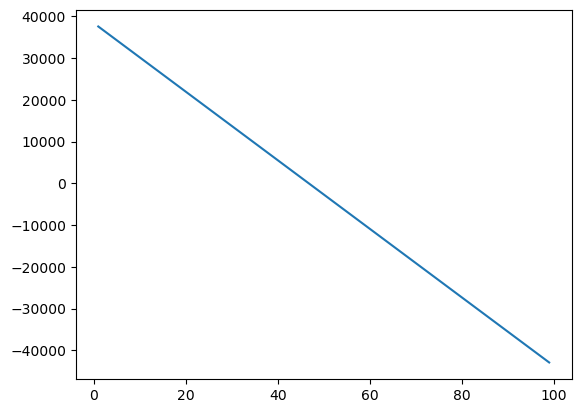

In [60]:
plt.plot(new_input, yhat)
plt.show()

<h3>Decision Making: Determining a Good Model Fit</h3>


<p>Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?
<ul>
    <li><i>What is a good R-squared value?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the higher R-squared value is a better fit</b> for the data.
<ul>
    <li><i>What is a good MSE?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the smallest MSE value is a better fit</b> for the data.</p>

<h4>Let's take a look at the values for the different models.</h4>
<p>Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.4965911884339175</li>
    <li>MSE: 3.16 x10^7</li>
</ul>
</p>

<p>Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
<ul>
    <li>R-squared: 0.8093732522175299</li>
    <li>MSE: 1.2 x10^7</li>
</ul>
</p>

<p>Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.6741946663906513</li>
    <li>MSE: 2.05 x 10^7</li>
</ul>
</p>


<h3>Simple Linear Regression Model (SLR) vs Multiple Linear Regression Model (MLR)</h3>


<p>In order to compare the results of the MLR vs SLR models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.
<ul>
    <li><b>MSE</b>: The MSE of SLR is  3.16x10^7  while MLR has an MSE of 1.2 x10^7.  The MSE of MLR is much smaller.</li>
    <li><b>R-squared</b>: In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR (~0.497) is very small compared to the R-squared for the MLR (~0.809).</li>
</ul>
</p>

This R-squared in combination with the MSE show that MLR seems like the better model fit in this case compared to SLR.


<h3>Simple Linear Model (SLR) vs. Polynomial Fit</h3>


<ul>
    <li><b>MSE</b>: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.</li> 
    <li><b>R-squared</b>: The R-squared for the Polynomial Fit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.</li>
</ul>
<p>Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting "price" with "highway-mpg" as a predictor variable.</p>


<h3>Multiple Linear Regression (MLR) vs. Polynomial Fit</h3>


<ul>
    <li><b>MSE</b>: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.</li>
    <li><b>R-squared</b>: The R-squared for the MLR is also much larger than for the Polynomial Fit.</li>
</ul>


<h2>Conclusion</h2>


<p>Comparing these three models, we conclude that <b>the MLR model is the best model</b> to be able to predict price from our dataset. This result makes sense since we have 27 variables in total and we know that more than one of those variables are potential predictors of the final car price.</p>
